In [ ]:
# file input and output 

In [3]:
# create a new path to a file
import pathlib
path = pathlib.Path("/Users/JingL/Downloads/hello.txt") # but cannot create the file or folder

In [ ]:
# in windows system: raw string
path = pathlib.Path(r"C:\Users\David\Desktop\hello.txt")

In [8]:
print("Hello\nJing") # \n means change line 

Hello
Jing


In [11]:
home = pathlib.Path.home()


In [10]:
home # Mac will show PosixPath()

PosixPath('/Users/JingL')

In [15]:
print("current working directory: ")
pathlib.Path.cwd()

current working directory: 


PosixPath('/Users/JingL/Documents/usf-master/fall 2024/TA/class code')

In [16]:
home/"Documents"

PosixPath('/Users/JingL/Documents')

In [17]:
new_dir = home/"Documents"
print(new_dir)

/Users/JingL/Documents


In [18]:
# absolute vs relative file path
rltv_path = pathlib.Path("fall 2024/TA/class code")
rltv_path.is_absolute()

False

In [ ]:
# both yeild the same result:
home/pathlib.Path("Documents")
home/"Documents" # Preferred for simplicity

In [20]:
# "/Users/JingL/Documents/usf-master/fall 2024/TA/class code"
path = pathlib.Path.home()/"Documents/usf-master/fall 2024/TA/class code/hello.txt"
print(path)
list(path.parents) # to list parent path

/Users/JingL/Documents/usf-master/fall 2024/TA/class code/hello.txt


[PosixPath('/Users/JingL/Documents/usf-master/fall 2024/TA/class code'),
 PosixPath('/Users/JingL/Documents/usf-master/fall 2024/TA'),
 PosixPath('/Users/JingL/Documents/usf-master/fall 2024'),
 PosixPath('/Users/JingL/Documents/usf-master'),
 PosixPath('/Users/JingL/Documents'),
 PosixPath('/Users/JingL'),
 PosixPath('/Users'),
 PosixPath('/')]

In [21]:
for dir in path.parents:
    print(dir)

/Users/JingL/Documents/usf-master/fall 2024/TA/class code
/Users/JingL/Documents/usf-master/fall 2024/TA
/Users/JingL/Documents/usf-master/fall 2024
/Users/JingL/Documents/usf-master
/Users/JingL/Documents
/Users/JingL
/Users
/


In [22]:
path.parent # the 1st parent directory

PosixPath('/Users/JingL/Documents/usf-master/fall 2024/TA/class code')

In [23]:
path.anchor

'/'

In [24]:
rltv_path.anchor

''

In [39]:
# to create a dirctory
path = pathlib.Path("/Users/JingL/Downloads/new_dira/new_dirb")
path.mkdir(parents=True, exist_ok=True) # create parent and child directory together, without covering the existing ones

In [34]:
new_dir = pathlib.Path("/Users/JingL/Downloads")  # Better if you want to manipulate files and folders
# new_dir = "/Users/JingL/Downloads"  # This cannot help you manipulate files or folders as effectively, result in typeerror
file_path = new_dir / "file1.txt"
file_path.touch()  # Creates the file if it doesn’t already exist


In [37]:
print(file_path.exists())
print(file_path.is_file())

True
True


In [41]:
path = pathlib.Path("/Users/JingL/Downloads/new_dira")
path.mkdir() # if I don't use exist_ok=True
#path.mkdir(exist_ok=True)

In [43]:
file_path = new_dir / "folder_c" / "file2.txt" # folder_c does not exist
file_path.touch() # result in error

FileNotFoundError: [Errno 2] No such file or directory: '/Users/JingL/Downloads/folder_c/file2.txt'

In [55]:
new_dir = pathlib.Path("/Users/JingL/Downloads")
file_path = new_dir / "folder_c" / "file2.txt"
file_path.parent.mkdir(exist_ok=True)  # Creates "folder_c" if it doesn’t exist
print(file_path.exists())  # Will print False since "file2.txt" does not exist yet
file_path.touch()
print(file_path.exists()) # True

True
True


In [59]:
file_path2 = new_dir / "folder_c" 
for path in file_path2.iterdir(): # Only print files
    print(path)

/Users/JingL/Downloads/folder_c/file2.txt


In [60]:
for path in file_path2.glob("*.txt"): # search for a directory
    print(path)

/Users/JingL/Downloads/folder_c/file2.txt


In [62]:
file_path = new_dir / "folder_c" / "file_a.txt"
file_path.touch()
file_path2 = new_dir / "folder_c" 

In [63]:
for path in file_path2.glob("*.txt"): 
    print(path)

/Users/JingL/Downloads/folder_c/file2.txt
/Users/JingL/Downloads/folder_c/file_a.txt


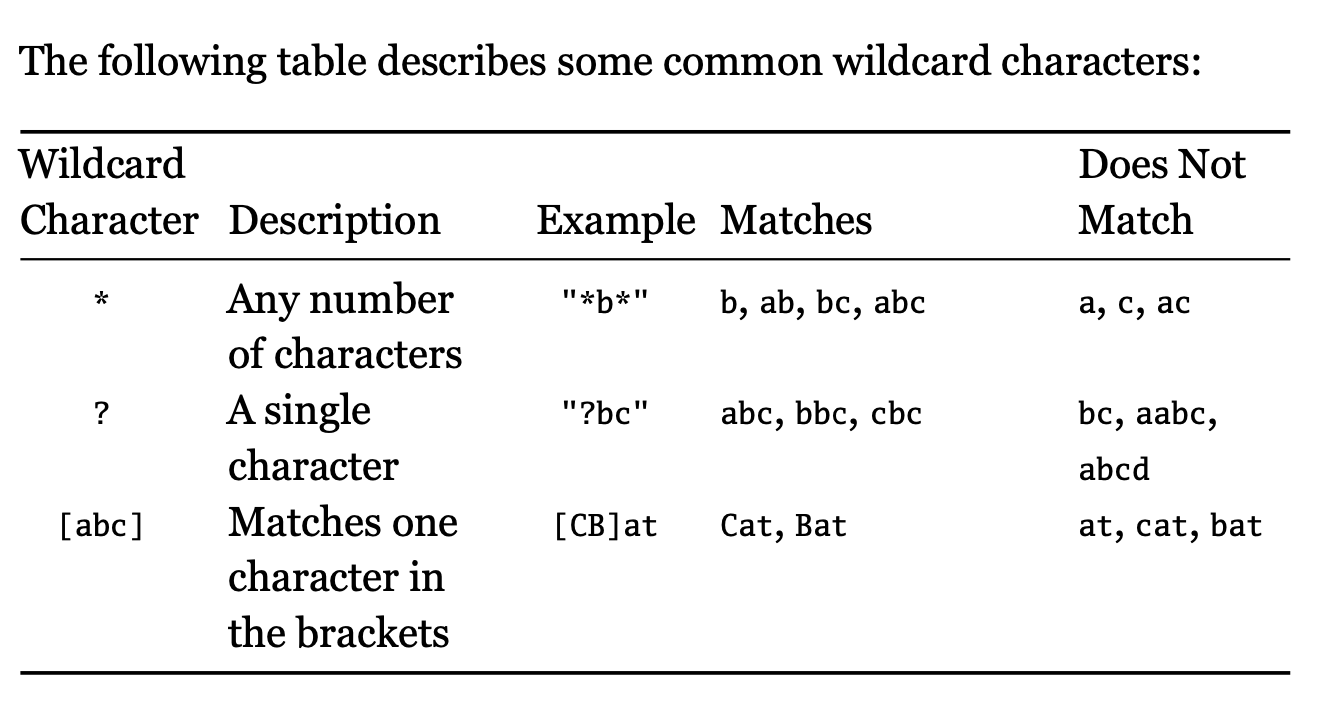

In [64]:
from PIL import Image
from IPython.display import display

# Open the image using PIL
img_for = Image.open('common wildcard characters.png')

# Display the image
display(img_for)

In [121]:
new_dir = pathlib.Path("/Users/JingL/Downloads/folder_c")
paths = [
new_dir / "program1.py",
new_dir / "program2.py",
new_dir / "folder_a" / "program3.py",
new_dir / "folder_a" / "folder_b" / "image1.jpg",
new_dir / "folder_a" / "folder_b" / "image2.png",
new_dir / "folder_a" / "folder_b" / "file3.txt"]
for path in paths:
    path.parent.mkdir(exist_ok=True)
    path.touch()

In [83]:
list(new_dir.glob("*.py"))

[PosixPath('/Users/JingL/Downloads/folder_c/program1.py'),
 PosixPath('/Users/JingL/Downloads/folder_c/program2.py')]

In [84]:
list(new_dir.glob("*1*"))

[PosixPath('/Users/JingL/Downloads/folder_c/program1.py')]

In [85]:
list(new_dir.glob("**/*.txt")) # ** represents current directory and any of its subdirectories.

[PosixPath('/Users/JingL/Downloads/folder_c/file2.txt'),
 PosixPath('/Users/JingL/Downloads/folder_c/file_a.txt'),
 PosixPath('/Users/JingL/Downloads/folder_c/folder_a/folder_b/file3.txt')]

In [125]:
# step1: create a file program1.py and edit it
source = new_dir/"program1.py"

#step2: pass it to destination
destination = new_dir / "folder_a" /"program5.py"
source.replace(destination) # now program5.py is replaced by program1.py, keeping only its name

PosixPath('/Users/JingL/Downloads/folder_c/folder_a/program5.py')

In [123]:
print(source.exists(), destination.exists())

False True


In [ ]:
# in Mac system:
# step1: create a file program1.py and edit it "new program1"
source = new_dir/"program1.py"
source.touch()
#step2: pass it to destination
destination = new_dir / "folder_a" # error because this is a directory not a file path
source.replace(destination) 

In [16]:
new_dir = pathlib.Path("/Users/JingL/Downloads/folder_c")
# step1: create a folder new_fld and edit it "new program1"
source = new_dir/"new_fld"
source.mkdir(exist_ok=True) # This will create a directory named "new_fld" inside `new_dir`
path2 = source 
path2.touch() # This will create a file test1.txt under new_fld


In [ ]:
# in Windows system, run this:
import pathlib
import shutil

# Define paths
new_dir = pathlib.Path(r"C:\Mac\Home\Downloads\folder_c")
source = new_dir / "new_fld"
destination2 = new_dir / "folder_d"

# Step 1: Create a folder `new_fld` and add a file `test1.txt`
source.mkdir(exist_ok=True)
test_file = source / "test1.txt"
test_file.touch()  # Create an empty file named `test1.txt`

# Step 2: Ensure destination folder `folder_d` exists
destination2.mkdir(exist_ok=True)

# Step 3: Move `test1.txt` to `folder_d`
shutil.move(str(test_file), destination2 / test_file.name) # to use move rather than replace due to a stricter filesystem rules on Windows,

# Optional: Remove the now-empty `new_fld` directory
if not any(source.iterdir()):  # Check if the directory is empty
    source.rmdir()

In [ ]:
#step2: move test1.txt to destination2
destination2 = new_dir / "folder_d" 
destination2.mkdir(exist_ok=True)
source.replace(destination2) 

In [145]:
new_dir = pathlib.Path("/Users/JingL/Downloads/folder_c")
paths = [
new_dir / "program1.py",
new_dir / "program2.py",
new_dir / "folder_a" / "program3.py",
new_dir / "folder_a" / "folder_b" / "image1.jpg",
new_dir / "folder_a" / "folder_b" / "image2.png",
new_dir / "folder_a" / "folder_b" / "file3.txt"]
for path in paths:
    path.parent.mkdir(exist_ok=True)
    path.touch()

In [139]:
path3 = new_dir/"program1.py"
path3.unlink()

In [140]:
path3.exists()

False

In [144]:
path3.unlink(missing_ok=True)

In [143]:
list(new_dir.iterdir())

[PosixPath('/Users/JingL/Downloads/folder_c/file2.txt'),
 PosixPath('/Users/JingL/Downloads/folder_c/file_a.txt'),
 PosixPath('/Users/JingL/Downloads/folder_c/.DS_Store'),
 PosixPath('/Users/JingL/Downloads/folder_c/folder_d'),
 PosixPath('/Users/JingL/Downloads/folder_c/program2.py'),
 PosixPath('/Users/JingL/Downloads/folder_c/folder_a')]

In [152]:
folder_d = new_dir / "folder_d" 
folder_d.mkdir(exist_ok=True)

In [153]:
folder_d.rmdir() # not empty

OSError: [Errno 66] Directory not empty: '/Users/JingL/Downloads/folder_c/folder_d'

In [154]:
folder_f = new_dir / "folder_f" 
folder_f.mkdir(exist_ok=True)

In [155]:
folder_f.rmdir()  # folder_f is removed, and check your trash, it should be empty

In [156]:
#  if I real want to remove a directory even thouhg it is not empty
import shutil
folder_d = new_dir / "folder_d" 
shutil.rmtree(folder_d)

In [157]:
folder_d.exists()

False

In [ ]:
"""Be cautious when moving/removing files or folders: Moving files or directories using methods 
like replace(), unlink(), rmdir(), rmtree() ...
can result in the loss of data if the destination already exists and is overwritten. """

In [ ]:
# reading and writing files, on textbook page 359-360
# differences on character encodings: ASCII, UTF-8, -16, -32
"""On modern Windows computers, txt files are usually encoded with UTF-16 or UTF-8.
 On macOS and Ubuntu Linux, the default character encoding is usually UTF-8."""
"""line ending: \r\n for windows;
\n is the line ending, \r is to change line"""

In [212]:
# Open a file using open() function
file = open('/Users/JingL/Documents/usf-master/fall 2024/TA/class code/hello.txt', mode='r', encoding="utf-8") # 'r': read mode, 'w': write mode , 'r+': read and write mode, 'w+': write and read mode 
# Read content
content = file.read()
print(content)

# Close the file after use
file.close()


hello
5
5.3


In [213]:
# write
# Step 1: Open the file in write mode ('w') to create it or overwrite it
file2 = open('/Users/JingL/Documents/usf-master/fall 2024/TA/class code/expl1.txt', 'w')

# Step 2: Write some content to the file
file2.write("Hello, this is a test file!")

# Step 3: Close the file after writing
file2.close()

# Step 4: Reopen the file in read mode ('r')
file2 = open('/Users/JingL/Documents/usf-master/fall 2024/TA/class code/expl1.txt', 'r')

# Step 5: Read the content of the file
content = file2.read()

# Step 6: Print the content
print(content)

# Step 7: Close the file after reading
file2.close()

Hello, this is a test file!


In [214]:
from pathlib import Path

# Create a Path object
path4 = pathlib.Path.cwd()
file_path = Path(f'{path4}/hello.txt')

# Open the file using Path.open()
with Path.open(file_path, mode = 'r') as file:
    content = file.read() # to read the file
    print(content)

hello
5
5.3


In [215]:
type(content)

str

In [216]:
from pathlib import Path

# Create a Path object
file_path = Path(f'{path4}/hello.txt')

# Open the file using Path.open()
with Path.open(file_path, mode = 'r') as file:
    for line in file.readlines():
        print(line) # print() function automatically inserts a newline
        #print(line, end="")

hello

5

5.3


In [217]:
from pathlib import Path

# Create a Path object
file_path = Path(f'{path4}/expl2.txt')

# Open the file using Path.open()
with Path.open(file_path, mode = 'w', encoding="utf-8") as file:
    file.write("Hello") # write and cover the original file

with Path.open(file_path, mode = 'r') as file:
    print(file.read())

Hello


In [199]:
from pathlib import Path

# Create a Path object
file_path = Path(f'{path4}/expl2.txt')

# Open the file using Path.open()
with Path.open(file_path, mode = 'a', encoding="utf-8") as file:
    #file.write("Hello") # write and append to the end
    file.write("\n\rHello") # write and append to the end

with Path.open(file_path, mode = 'r') as file:
    print(file.read())

Hello

Hello

Hello


In [201]:
from pathlib import Path

# Create a Path object
file_path = Path(f'{path4}/expl_fld/expl2.txt') # parent folder does not exist
#file_path.parent.mkdir(parents=True) # create parent folder

# Open the file using Path.open()
with Path.open(file_path, mode = 'a', encoding="utf-8") as file:
    #file.write("Hello") # write and append to the end
    file.write("\n\rHello") # write and append to the end

with Path.open(file_path, mode = 'r') as file:
    print(file.read())



Hello


In [202]:
# deal with CSV file
temp_list = [68, 65, 68, 70, 74, 72]

In [218]:
from pathlib import Path
file_path = Path(f'{path4}/expl_fld/temperatures.txt')
with file_path.open(mode='w') as file: # using open from Path, because file_path is Paht object
    file.write(str(temp_list[0]))


In [233]:
from pathlib import Path
file_path = Path(f'{path4}/expl_fld/temperatures2.txt')
with file_path.open(mode='w') as file: # using open from Path, because file_path is Paht object
    for temp in temp_list[0:]:
        file.write(f"{temp} ")

In [234]:
with file_path.open(mode='r') as file:
    temp_read = file.read()
print(temp_read)

68 65 68 70 74 72 


In [243]:
# create a CSV file
from pathlib import Path
file_path = Path(f'{path4}/expl_fld/temperatures1.txt')
with file_path.open(mode='a') as file: # using open from Path, because file_path is Paht object
    file.write(str(temp_list[0]))
    for temp in temp_list[1:]:
        file.write(f", {temp}")

In [255]:
# read the CSV file
with file_path.open(mode='r') as file:
    temp_read = file.read()
print(temp_read)
print(type(temp_read)) # temp_read is a string, not a list

68, 65, 68, 70, 74, 72
<class 'str'>


In [245]:
temp_list2 = temp_read.split(",")
print(temp_list2)

['68', ' 65', ' 68', ' 70', ' 74', ' 72']


In [257]:
type(temp_list2[0])
#type(temp_list2) # string

str

In [258]:
temp_list3 = [int(i) for i in temp_list2] # int() only apply for string not a list

In [259]:
print(temp_list3)
print(type(temp_list3[0]))

[68, 65, 68, 70, 74, 72]
<class 'int'>


In [262]:
# CSV module
import csv


In [260]:
daily_temperatures = [
    [68, 65, 68, 70, 74, 72],
    [67, 67, 70, 72, 72, 70],
    [68, 70, 74, 76, 74, 73],
]
print(type(daily_temperatures))

<class 'list'>


In [261]:
path4 = pathlib.Path.cwd()
file_path = Path(f'{path4}/temperatures.csv')

In [270]:
# Open a file in write mode
with open('temperatures.csv', mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    for temp in daily_temperatures:
        writer.writerow(temp)


In [277]:
# writerows()
"""both Path.open() and the built-in open() can create a new file if it does not exist 
when used with the mode 'w' (write) or 'a' (append). """

with Path.open('temperatures2.csv', mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    writer.writerows(daily_temperatures)


In [278]:
dailytemperature_list = []
with Path.open('temperatures2.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        row_int = [int(temp) for temp in row]
        print(row_int)

[68, 65, 68, 70, 74, 72]
[67, 67, 70, 72, 72, 70]
[68, 70, 74, 76, 74, 73]


In [280]:
dailytemperature_list = []
with Path.open('temperatures2.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        row_int = [int(temp) for temp in row]
        dailytemperature_list.append(row_int)
        print(dailytemperature_list)

[[68, 65, 68, 70, 74, 72]]
[[68, 65, 68, 70, 74, 72], [67, 67, 70, 72, 72, 70]]
[[68, 65, 68, 70, 74, 72], [67, 67, 70, 72, 72, 70], [68, 70, 74, 76, 74, 73]]


In [282]:
print(dailytemperature_list)

[[68, 65, 68, 70, 74, 72], [67, 67, 70, 72, 72, 70], [68, 70, 74, 76, 74, 73]]


In [296]:
import csv

with open('employment.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Age', 'City'])
    writer.writerow(['Alice', 30, 'New York'])
    writer.writerow(['Bob', 25, 'Los Angeles'])

In [312]:
file_path = path4/ "employment.csv"
file = file_path.open(mode="r", encoding="utf-8")
reader = csv.DictReader(file) # create a DictReader object, recall "calss", DictReader is a class

In [300]:
reader

In [301]:
# hover you pointer on csv and DictReader to see what are they
csv.DictReader

csv.DictReader

In [314]:
reader.fieldnames

['Name', 'Age', 'City']

In [316]:
for row in reader:
    print(row)
    print(float(row['Age']))

In [319]:
with Path.open('employment.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)
        print(float(row['Age']))

{'Name': 'Alice', 'Age': '30', 'City': 'New York'}
30.0
{'Name': 'Bob', 'Age': '25', 'City': 'Los Angeles'}
25.0


In [320]:
daily_temperatures2 = [
    [1, 68, 65, 68, 70, 74, 72],
    [2, 67, 67, 70, 72, 72, 70],
    [3, 68, 70, 74, 76, 74, 73],
]

In [323]:
# Define the column names (headers)
fieldnames = ['ID', 'day1', 'day2','day3','day4','day5','day6']

# Writing to the CSV file using DictWriter
with open('temperature3.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames) # have to use dictionary
    
    # Write the header (column names)
    writer.writeheader()
    
    # Write data rows as dictionary
    for row in daily_temperatures2:
        row_dict = {fieldnames[i]: row[i] for i in range(len(fieldnames))}
        writer.writerow(row_dict)

# Reading the file to verify
with open('temperature3.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)

{'ID': '1', 'day1': '68', 'day2': '65', 'day3': '68', 'day4': '70', 'day5': '74', 'day6': '72'}
{'ID': '2', 'day1': '67', 'day2': '67', 'day3': '70', 'day4': '72', 'day5': '72', 'day6': '70'}
{'ID': '3', 'day1': '68', 'day2': '70', 'day3': '74', 'day4': '76', 'day5': '74', 'day6': '73'}
